In this class we will use simple regression to predict the car price from "automobileEDA.csv" file

        To know if the dealer is offering fair value for my trade-in.

        To know if i put a fair value on my car..

In [26]:
import pandas as pd

In [27]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [28]:
data = pd.read_csv('automobileEDA.csv')
data.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [29]:
data_ = data['highway-mpg']
data_


0      27
1      27
2      26
3      30
4      22
       ..
196    28
197    25
198    23
199    27
200    25
Name: highway-mpg, Length: 201, dtype: int64

In [30]:
x = data.drop('price', axis=1) #independent variable
y = data['price'] #dependent variable

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=10)


In [32]:
x_train

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,city-L/100km,horsepower-binned,diesel,gas
7,1,122,audi,std,four,wagon,fwd,front,105.8,0.925997,...,3.40,8.5,110.0,5500.0,19,25,12.368421,Medium,0,1
26,1,148,dodge,turbo,four,sedan,fwd,front,93.7,0.755887,...,3.39,7.6,102.0,5500.0,24,30,9.791667,Medium,0,1
144,0,85,subaru,std,four,wagon,4wd,front,96.9,0.834214,...,2.64,9.0,82.0,4800.0,23,29,10.217391,Low,0,1
58,1,129,mazda,std,two,hatchback,fwd,front,98.8,0.854397,...,3.39,8.6,84.0,4800.0,26,32,9.038462,Low,0,1
72,1,122,mercury,turbo,two,hatchback,rwd,front,102.7,0.857280,...,3.12,8.0,175.0,5000.0,19,24,12.368421,High,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,0,161,peugot,turbo,four,sedan,rwd,front,107.9,0.897165,...,3.52,21.0,95.0,4150.0,28,33,8.392857,Low,1,0
64,-1,93,mercedes-benz,turbo,four,sedan,rwd,front,110.0,0.917347,...,3.64,21.5,123.0,4350.0,22,25,10.681818,Medium,1,0
15,0,122,bmw,std,two,sedan,rwd,front,103.5,0.931283,...,3.39,8.0,182.0,5400.0,16,22,14.687500,High,0,1
125,3,122,porsche,std,two,convertible,rwd,rear,89.5,0.811629,...,2.90,9.5,207.0,5900.0,17,25,13.823529,High,0,1


In [33]:
x_train_simple = x_train['highway-mpg'].values.reshape(-1,1)#converting 2d array using reshape
x_test_simple = x_test['highway-mpg'].values.reshape(-1,1)

In [34]:
x_train_simple

array([[25],
       [30],
       [29],
       [32],
       [24],
       [25],
       [25],
       [32],
       [38],
       [38],
       [29],
       [25],
       [33],
       [38],
       [42],
       [24],
       [16],
       [37],
       [38],
       [30],
       [24],
       [37],
       [30],
       [28],
       [18],
       [34],
       [29],
       [25],
       [25],
       [24],
       [33],
       [25],
       [29],
       [22],
       [32],
       [32],
       [30],
       [25],
       [31],
       [24],
       [24],
       [34],
       [28],
       [38],
       [38],
       [23],
       [33],
       [53],
       [38],
       [38],
       [22],
       [32],
       [30],
       [29],
       [54],
       [30],
       [38],
       [38],
       [31],
       [33],
       [28],
       [30],
       [38],
       [19],
       [33],
       [34],
       [46],
       [24],
       [29],
       [28],
       [26],
       [24],
       [28],
       [29],
       [46],
       [24],
       [34],

In [35]:
simple_lr = LinearRegression()
simple_lr.fit(x_train_simple, y_train)

LinearRegression()

In [36]:
y_hat = simple_lr.predict(x_test_simple)
y_hat[0:5]


array([12217.80151177, 18308.29817917,  4387.16293939, 13087.87246425,
       20048.44008414])

In [37]:
simple_lr.intercept_

40060.07199132972

In [38]:
simple_lr.coef_.item()

-870.0709524863101

## Exercise:
<li> -fit simple linear regression with "engine size" as independent variable to predict car price</li>
<li> -fit simple linear regression with "horse powe"r as independent variable to predict car price</li>

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)


In [40]:
x_train_simple1 = x_train['engine-size'].values.reshape(-1,1) #reshape(-1,1) gives the colunn (axis = 1) and reshape(-1) gives the row (axis = 0)
x_test_simple1 = x_test['engine-size'].values.reshape(-1,1)


In [44]:
simple_lr1 = LinearRegression()
simple_lr1.fit(x_train_simple1, y_train)

LinearRegression()

In [45]:
y_hat1 = simple_lr1.predict(x_test_simple1)
y_hat1[0:5]

array([ 8468.83905442, 25073.52802615,  7727.55829675,  8617.09520595,
       12026.98669122])

In [52]:
c = simple_lr1.intercept_ # this is value of c in equn y = mx + c

In [53]:
m = simple_lr1.coef_  #this is value of slope(m) in the equn y = mx+c

In [55]:
# #To prove
# price = m*data['engine-size', [0]] + c
# price

<li> -fit simple linear regression with "horse powe"r as independent variable to predict car price</li>

In [56]:
x_test_simple2 = x_test['horsepower'].values.reshape(-1,1)
x_train_simple2 = x_train['horsepower'].values.reshape(-1,1)

In [57]:
simple_lr2 = LinearRegression()
simple_lr2.fit(x_train_simple2, y_train)

LinearRegression()

In [58]:
y_hat2 = simple_lr2.predict(x_test_simple2)
y_hat2[:3]

array([ 7573.18769551, 24736.68310929,  8636.41307513])

In [26]:
to_select = ['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']

x_train_multi = x_train[to_select].values
x_test_multi = x_test[to_select].values


In [27]:
x_train_multi

array([[ 110.        , 2954.        ,  136.        ,   25.        ],
       [ 102.        , 2191.        ,   98.        ,   30.        ],
       [  82.        , 2420.        ,  108.        ,   29.        ],
       [  84.        , 2385.        ,  122.        ,   32.        ],
       [ 175.        , 2910.        ,  140.        ,   24.        ],
       [ 160.        , 3139.        ,  181.        ,   25.        ],
       [ 114.        , 3062.        ,  141.        ,   25.        ],
       [  84.        , 2385.        ,  122.        ,   32.        ],
       [  68.        , 1967.        ,   90.        ,   38.        ],
       [  68.        , 1989.        ,   90.        ,   38.        ],
       [  90.        , 2734.        ,  119.        ,   29.        ],
       [ 160.        , 3071.        ,  181.        ,   25.        ],
       [  73.        , 2480.        ,  110.        ,   33.        ],
       [  68.        , 1876.        ,   90.        ,   38.        ],
       [  64.        , 2443.      

In [32]:
multi_lr = LinearRegression()
multi_lr.fit(x_train_multi, y_train)


LinearRegression()

In [38]:
y_hat_mul = multi_lr.predict(x_test_multi)
y_hat_mul[:5]

array([11105.79429764, 13917.723933  ,  5620.01234739, 13535.65296204,
        6365.75982403])

In [39]:
multi_lr.intercept_

-19402.318064894604

In [40]:
multi_lr.coef_

array([67.84826111,  4.24164899, 94.06398398, 97.20869735])

Exercise

Fit multiple linear regression with [engine-size, horsepower] as independent variable to predict car price

fit multiple linear regression with [normalized-losses, highway-mpg] as independent variaple to predict car price


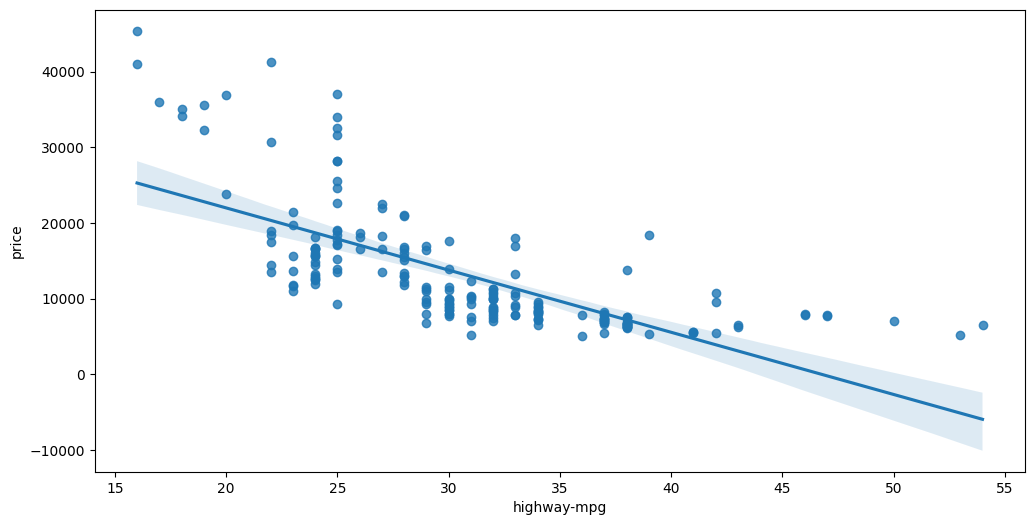

In [43]:
plt.figure(figsize=(12,6))
sns.regplot(x = 'highway-mpg', y='price', data=data)
plt.show()


We see slope of the line is -ve, which we predicted earlier when fitting simple linear reression line.

More dispersed is the data point from the regression line, it will be not suitable to model such data point with linear regression.

hence, if the data is too far from the line, this linear model might not be the best fit model for this data.

In above plot, data is not perfectly linear, so simple polynomial regression can do a better job, since it can cpture non-linear data.


[]

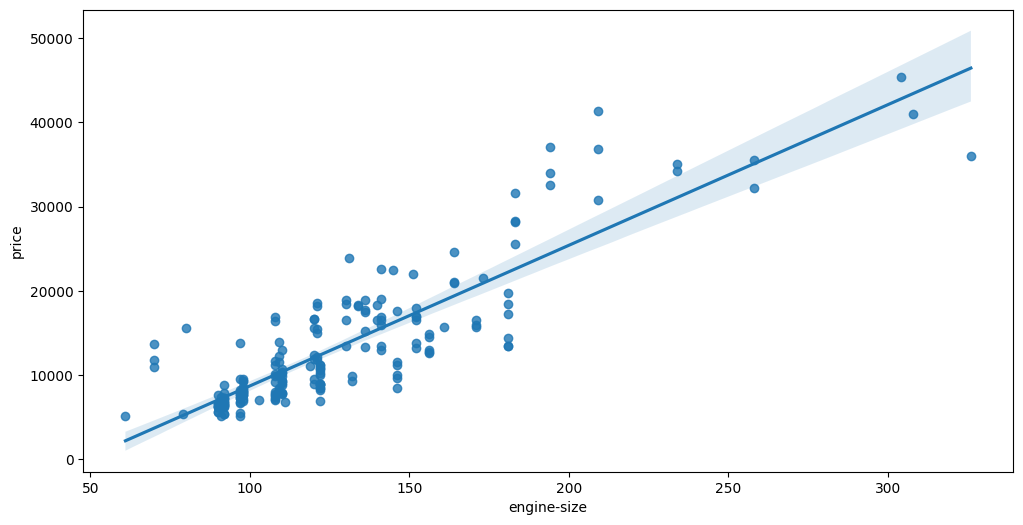

In [47]:
plt.figure(figsize=(12,6))
sns.regplot(x='engine-size', y=data['price'], data=data)
plt.plot()


This shows that increse in engine-size increases the price of the c i.e position correlation


Distribution plot

We successfully visualize simple linear regression model using regression plot. it will be complicated for multiple linear regression since there will be multiple independet variables, in such scenarios we could using distribution plot.

Now let's visualize our prediction from linear regression model using distribution plot

It helps us to show wheather the figure is left, right, zero skewed

/tmp/ipykernel_11426/1805385394.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  axl = sns.distplot(y_test, hist=False, color='r', label='Actual Value')
/tmp/ipykernel_11426/1805385394.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_hat, hist=False, color='b', label='Fitted Value',

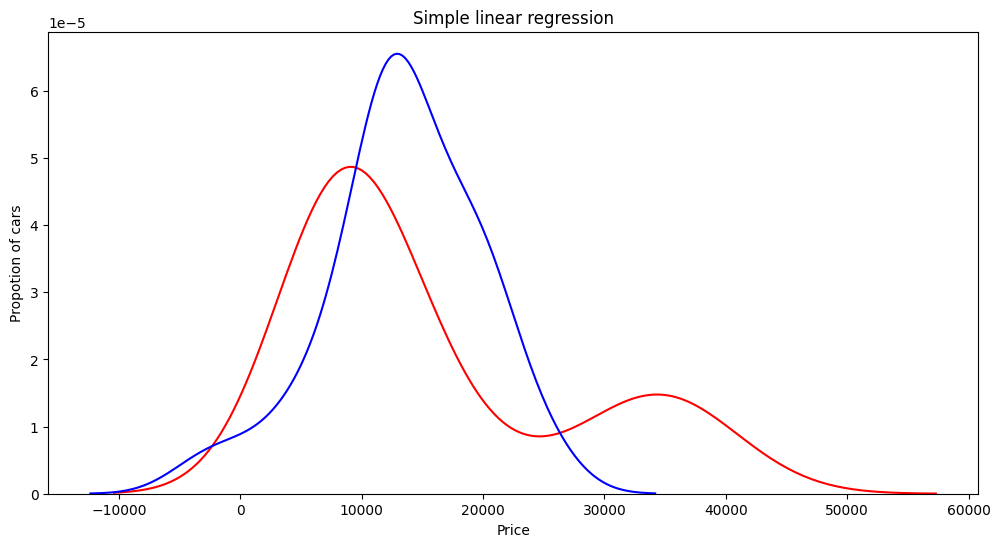

In [48]:
plt.figure(figsize=(12,6))
axl = sns.distplot(y_test, hist=False, color='r', label='Actual Value')
sns.distplot(y_hat, hist=False, color='b', label='Fitted Value', ax=axl)



# plt.title('Simple linear regression actual Vs fitted values ')
plt.title('Simple linear regression')
plt.xlabel('Price')
plt.ylabel('Propotion of cars')
plt.show()

